<a href="https://colab.research.google.com/github/MariliaRot/Covid-19/blob/master/COVID_DADOS_DATAFRAME_MS_PAINEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratoria de dados - COVID19 no Ceará
Objetivo = fazer a predição de casos utilizando o modelo SIR (Sucetiveis - Infectados - Recuperados)

Fonte dos dados : Painel Corona Virus - Ministerio da Saude (https://covid.saude.gov.br/)

In [4]:
# Montando o Google Drive para obtenção da base de dados
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


import 

In [50]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy import linalg, optimize

In [19]:
# IMportando o arquivo CSV do GoogleDrive
caminho_dados_br_originais = '/content/drive/My Drive/Colab Notebooks/PAINEL_MINISTERIO_DA_SAUDE-BR/HIST-COVIDBR-26082020.csv'
caminho_dados_limpos_julho = '/content/drive/My Drive/Colab Notebooks/PAINEL_MINISTERIO_DA_SAUDE-BR/dadosCE-31-07-2020.csv'
caminho_dados_limpos_agosto = '/content/drive/My Drive/Colab Notebooks/PAINEL_MINISTERIO_DA_SAUDE-BR/dadosCE-26-08-2020.csv'

dadosBRbruto = pd.read_csv(caminho_dados_br)
dadosJulho = pd.read_csv(caminho_dados_limpos_julho)
dadosAgosto= pd.read_csv(caminho_dados_limpos_agosto)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#apresentando as informações dos dados originais
dadosBRbruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858433 entries, 0 to 858432
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              858433 non-null  int64  
 1   regiao                  858433 non-null  object 
 2   estado                  858249 non-null  object 
 3   municipio               850068 non-null  object 
 4   coduf                   858433 non-null  int64  
 5   codmun                  853281 non-null  float64
 6   codRegiaoSaude          850068 non-null  float64
 7   nomeRegiaoSaude         850068 non-null  object 
 8   data                    858433 non-null  object 
 9   semanaEpi               858433 non-null  int64  
 10  populacaoTCU2019        855220 non-null  object 
 11  casosAcumulado          858433 non-null  int64  
 12  casosNovos              858433 non-null  int64  
 13  obitosAcumulado         858433 non-null  int64  
 14  obitosNovos         

In [26]:
#apresentando as informações dos dados reduzidos
# Foram selecionadasretirados dos dados originais apenas as colunas: 
# ['estado','data','semanaEpi','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']
# e exclusivamente as que tinha CE como valor na coluna 'estado'
dadosJulho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       137 non-null    int64  
 1   estado           137 non-null    object 
 2   data             137 non-null    object 
 3   semanaEpi        137 non-null    float64
 4   casosAcumulado   137 non-null    float64
 5   casosNovos       137 non-null    float64
 6   obitosAcumulado  137 non-null    float64
 7   obitosNovos      137 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 8.7+ KB


In [27]:
dadosJulho.describe()
# até 31 de julho de 2020 tinhamos 173882 casos acumulados e 7668 óbitos

,Unnamed: 0,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.000000,21.569343,56584.817518,1269.211679,3088.744526,55.970803
std,39.692569,5.677349,56791.493875,1287.667325,2834.182443,55.427475
min,1.000000,12.000000,5.000000,4.000000,0.000000,0.000000
25%,35.000000,17.000000,3482.000000,229.000000,198.000000,12.000000
50%,69.000000,22.000000,35595.000000,744.000000,2324.000000,41.000000
75%,103.000000,26.000000,106628.000000,2296.000000,5981.000000,83.000000
max,137.000000,31.000000,173882.000000,8111.000000,7668.000000,261.000000


In [41]:
## Quantidade de casos por ESTADO - dados brutos - 26-08-2020
dadosBRbruto.filter(items=['estado','casosAcumulado','obitosAcumulado'])\
.groupby('estado').max().sort_values(by='casosAcumulado', ascending= False)

,casosAcumulado,obitosAcumulado
estado,,
SP,776135,29194
BA,245021,5116
RJ,216675,15700
CE,208782,8351
MG,201973,4948
PA,193564,6097
DF,155253,2399
MA,147676,3390
SC,137560,2142


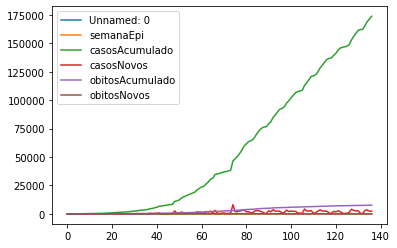

In [20]:
casosAcumData= dadosBRbruto.where(dadosBRbruto.estado =='CE')
#casosAcumData

dadosJulho.plot()

In [18]:
casosAcumData.to_csv("dadosCE.csv")

Text(0, 0.5, 'Numeros de casos')

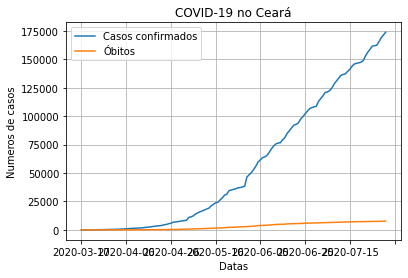

In [59]:
# Plotando os dados do Ceara ate 31-07-2020
fig = plt.figure()
ax = plt.axes()
dadosJulho.set_index('data')['casosAcumulado'].plot(legend=True, grid=True, label='Casos confirmados');
dadosJulho.set_index('data')['obitosAcumulado'].plot(legend=True, grid=True, label='Óbitos');
plt.title("COVID-19 no Ceará")
plt.xlabel("Datas")
plt.ylabel("Numeros de casos")

In [63]:
#colocando dados casos acumludados e suas datas em listas

ydata =dadosJulho['casosAcumulado'].to_numpy()
xdata = dadosJulho['data'].to_numpy()
mortos = dadosJulho['obitosAcumulado'].to_numpy()

In [48]:
print(len(ydata))
print(len(xdata))

137
137


In [ ]:
# Total população segundo IBGE 2019, N.
N = 9187103 
# número inicial de infectados e recuperados
I0, R0 = 1, 0
# Todo o restante, S0, são sucetiveis a contaminação.
S0 = N - I0 - R0
# Taxa de contagio, beta, e a media da taxa de recuperação, gamma, por dia.
#beta, gamma = 1.0E-3,1.0E-3 

t = np.linspace(start = 1, stop = 137, num = 137)

print(t)
print(ydata.shape[0])
print(xdata.shape[0])

In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dMdt = gamma * I
    return dSdt, dIdt, dMdt

def obj(x):
  y0 = S0, I0, R0
  ret = odeint(deriv, y0, t, args=(N, x[0], x[1]))
  S, I, R = ret.T  
  return linalg.norm(I-ydata) +linalg.norm(R-mortos)

inovo=linalg.norm(I-ydata) +linalg.norm(R-mortos)

x0 = np.array([10,10])
result = minimize(obj, x0, method='Nelder-Mead', tol=1e-7)
print("minimizando ",result.fun,result.x)

beta = result.x[0]
gamma = result.x[1]
# Initial conditions vector
y0 = S0, I0, R0
#time
t2 = np.linspace(start = 1, stop = 163, num = 163)
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
print("Dias utilizados na analise:  ",t)
print("Dias + projeção:  ",t2)
print("infectados: ",I.max())
print()
print("RECUPERADOS:  ",R)
print("mORTOS:  ",mortos)





# Plotando os dados em 3 curvas separadas S(t), I(t) e R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'r', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectado')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.plot(t, ydata, 'b', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, mortos, 'p', alpha=0.5, lw=2, label='Obitos')
ax.set_xlabel('Tempo /dias')
ax.set_ylabel('Número de pessoas')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


## Fazendo previsões